# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [13]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [2]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
# sprawdzam warunki
    if not isinstance(m, int) or not isinstance(n, int):
        return None
    if m <= 0 or n <= 0: 
        return None
    

    t = np.linspace(0, 1, m)
    b = np.cos(4*t) # tak tworze wektor na podstawie wektora t
    A = np.vander(t, n, increasing=True) #increasing true robi tak macierz jak w poleceniu, jak nie dasz n to ci zrobi kwadratowa
    return (A, b)

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [ ]:
# ===== Twoja implementacja tutaj =====
def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:
    """Funkcja obliczająca normę residuum dla równania postaci:
    Ax = b

    Args:
        A (np.ndarray): Macierz A (m,n) zawierająca współczynniki równania.
        x (np.ndarray): Wektor x (n,) zawierający rozwiązania równania.
        b (np.ndarray): Wektor b (m,) zawierający współczynniki po prawej stronie równania.

    Returns:
        (float): Wartość normy residuum dla podanych parametrów.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if not isinstance(A,np.ndarray) or not isinstance(x, np.ndarray) or not isinstance(b,np.ndarray):
        return None
    if A.ndim != 2 or b.ndim != 1 or A.shape[0] != len(b):
        return None
    r = A @ x - b
    return np.linalg.norm(r)
def square_from_rectan(
    A: np.ndarray, b: np.ndarray
) -> tuple[np.ndarray, np.ndarray] | None:
    
    if not isinstance(A, np.ndarray) or not isinstance(b, np.ndarray):
        return None
    
    if A.ndim != 2 or b.ndim != 1 or A.shape[0] != len(b):
        return None
    A_new = (A.T) @ A
    b_new = (A.T) @ b
    return (A_new,b_new)


(A,b) = spare_matrix_Abt(50,12)
(At,bt) = square_from_rectan(A,b)

def linalg_solve(A,b):
    x = np.linalg.solve(A,b)
    return x
def linalg_lstsq(A,b):
    x, residuals, rank, s = np.linalg.lstsq(A,b,rcond = None)
    return x

def linalg_qr(A, b):
    Q, R = np.linalg.qr(A)
    # Obliczam Q^T b
    Qtb = Q.T @ b
    # Rozwiązuje układ trójkątny Rx = Qtb
    x = sp.linalg.solve_triangular(R, Qtb, lower=False)
    return x
def lianlg_svd(A, b):
    U, s, Vh = np.linalg.svd(A, full_matrices=False)
    c = U.T @ b
    # w = Sigma^+ @ c  (Sigma^+ jest diagonalna, więc to dzielenie)
    w = c / s
    #  x = V @ w  (V = Vh.T)
    x = Vh.T @ w
    return x




In [ ]:
# --- Listy do przechowywania wyników ---
normy = []
czasy = []
pamiec = []

print("Rozpoczynanie obliczeń i profilowania...")

# --- 1. Metoda Równań Normalnych ---
x_ne = linalg_solve(At, bt)
normy.append(residual_norm(At,x_ne,bt))
# Używamy -o (output) aby przechwycić wynik do zmiennej
time_obj_ne = %timeit -o -r 7 -n 1000 linalg_solve(At, bt)
czasy.append(time_obj_ne)
# Mierzymy przyrost pamięci (peak - start) w MiB
mem_usage_ne = memory_usage((linalg_solve, (At, bt)), interval=0.01)
pamiec.append(max(mem_usage_ne) - mem_usage_ne[0])

# --- 2. Metoda np.linalg.lstsq ---
x_lsq = linalg_lstsq(A, b)
normy.append(residual_norm(A,x_lsq,b))
time_obj_lsq = %timeit -o -r 7 -n 1000 linalg_lstsq(A, b)
czasy.append(time_obj_lsq)
mem_usage_lsq = memory_usage((linalg_lstsq, (A, b)), interval=0.01)
pamiec.append(max(mem_usage_lsq) - mem_usage_lsq[0])

# --- 3. Metoda QR ---
x_qr = linalg_qr(A, b)
normy.append(residual_norm(A,x_qr,b))
time_obj_qr = %timeit -o -r 7 -n 1000 linalg_qr(A, b)
czasy.append(time_obj_qr)
mem_usage_qr = memory_usage((linalg_qr, (A, b)), interval=0.01)
pamiec.append(max(mem_usage_qr) - mem_usage_qr[0])

# --- 4. Metoda SVD ---
x_svd = lianlg_svd(A, b)
normy.append(residual_norm(A,x_svd,b))
time_obj_svd = %timeit -o -r 7 -n 1000 lianlg_svd(A, b)
czasy.append(time_obj_svd)
mem_usage_svd = memory_usage((lianlg_svd, (A, b)), interval=0.01)
pamiec.append(max(mem_usage_svd) - mem_usage_svd[0])

print("... Zakończono profilowanie.")
print("\n" + "="*40)
print("     ZESTAWIENIE WYNIKÓW PROFILOWANIA")
print("="*40 + "\n")

# --- Wyświetlanie w zadanym formacie ---

print("Wyznaczona norma residuum dla kolejnych metod obliczeń:") 
print(f"Pierwsza metoda :  {normy[0]:.3e}")
print(f"Druga metoda    :  {normy[1]:.3e}")
print(f"Trzecia metoda  :  {normy[2]:.3e}")
print(f"Czwarta metoda  :  {normy[3]:.3e}")
print("")

print("Czas wykonywania dla kolejnych metod obliczeń:")
# Obiekt TimeitResult po konwersji na str() ma format "X µs ± Y µs..."
# Twoje cięcie [ :29] jest tutaj idealnie dopasowane
print(f"Pierwsza metoda :  {str(czasy[0])[:29]}")
print(f"Druga metoda    :  {str(czasy[1])[:29]}")
print(f"Trzecia metoda  :  {str(czasy[2])[:29]}")
print(f"Czwarta metoda  :  {str(czasy[3])[:29]}")
print("")

print("Użyta pamięć dla kolejnych metod obliczeń:")
# Wynik 'memory' jest liczbą (w MiB), więc formatujemy go dla czytelności
print(f"Pierwsza metoda :  {pamiec[0]:.4f} MiB (przyrostu)")
print(f"Druga metoda    :  {pamiec[1]:.4f} MiB (przyrostu)")
print(f"Trzecia metoda  :  {pamiec[2]:.4f} MiB (przyrostu)")
print(f"Czwarta metoda  :  {pamiec[3]:.4f} MiB (przyrostu)")

Rozpoczynanie obliczeń i profilowania...
4.83 μs ± 172 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
19.5 μs ± 509 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
25.8 μs ± 2.46 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
28 μs ± 3.87 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
... Zakończono profilowanie.

     ZESTAWIENIE WYNIKÓW PROFILOWANIA

Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  4.727e-14
Druga metoda    :  7.999e-09
Trzecia metoda  :  7.999e-09
Czwarta metoda  :  7.999e-09

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  4.83 μs ± 172 ns per loop (me
Druga metoda    :  19.5 μs ± 509 ns per loop (me
Trzecia metoda  :  25.8 μs ± 2.46 μs per loop (m
Czwarta metoda  :  28 μs ± 3.87 μs per loop (mea

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  0.0000 MiB (przyrostu)
Druga metoda    :  0.0000 MiB (przyrostu)
Trzecia metoda  :  0.0000 MiB (przyrostu)
Czwarta meto

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [ ]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

--- Zadanie 3.1: Regresja Liniowa ---
Zależność: wydatki = a * dochody + b
Obliczone współczynniki: a = 0.7861, b = -3.5036
Dopasowana linia: w = 0.7861 * d + -3.5036

--- Zadanie 3.2: Analiza Błędu ---
Suma kwadratów reszt (RSS) modelu liniowego: 3405.14
Pierwiastek błędu średniokwadratowego (RMSE): 18.45


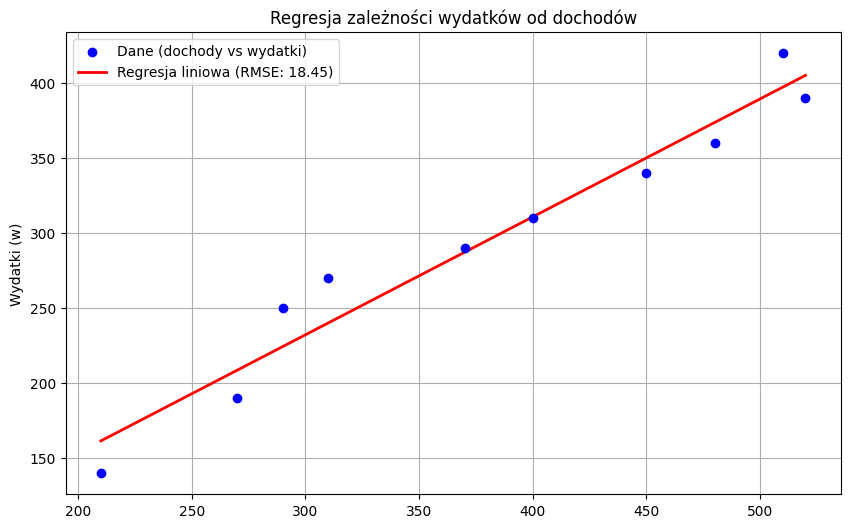

In [23]:
# ===== Twoja implementacja tutaj =====
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

# Chcemy znaleźć współczynniki [b, a] w równaniu:
# b * 1 + a * d = w
# Tworzymy macierz A (zgodnie ze wskazówką dot. regresji):
# Kolumna jedynek dla wyrazu wolnego 'b'
# Kolumna 'd_data' dla współczynnika 'a'
A_lin = np.column_stack([np.ones_like(d), d])

# Rozwiązujemy układ A*x = w metodą najmniejszych kwadratów
# wynik[0] zawiera wektor współczynników x = [b, a]
# wynik[1] zawiera sumę kwadratów reszt (błąd)
wynik_lin = np.linalg.lstsq(A_lin, w, rcond=None)

# Odczytujemy współczynniki
wspolczynniki_lin = wynik_lin[0]
b_lin = wspolczynniki_lin[0]
a_lin = wspolczynniki_lin[1]

print("--- Zadanie 3.1: Regresja Liniowa ---")
print(f"Zależność: wydatki = a * dochody + b")
print(f"Obliczone współczynniki: a = {a_lin:.4f}, b = {b_lin:.4f}")
print(f"Dopasowana linia: w = {a_lin:.4f} * d + {b_lin:.4f}")


# Błąd (suma kwadratów reszt - RSS) jest zwracany przez lstsq
rss_lin = wynik_lin[1][0]
# Obliczamy Błąd Średniokwadratowy (MSE) i jego pierwiastek (RMSE)
mse_lin = rss_lin / len(w)
rmse_lin = np.sqrt(mse_lin)

print("\n--- Zadanie 3.2: Analiza Błędu ---")
print(f"Suma kwadratów reszt (RSS) modelu liniowego: {rss_lin:.2f}")
print(f"Pierwiastek błędu średniokwadratowego (RMSE): {rmse_lin:.2f}")


d_plot = np.linspace(d.min(), d.max(), 100)
w_plot_lin = b_lin + a_lin * d_plot


# Wykres 1: Dopasowanie modeli
plt.figure(figsize=(10, 6))
plt.scatter(d, w, label='Dane (dochody vs wydatki)', color='blue', zorder=5)
plt.plot(d_plot, w_plot_lin, label=f'Regresja liniowa (RMSE: {rmse_lin:.2f})', color='red', linewidth=2)
plt.ylabel('Wydatki (w)')
plt.title('Regresja zależności wydatków od dochodów')
plt.legend()
plt.grid(True)
plt.show()



---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

Wymiary x1: (100, 1)
Wymiary x2: (100, 1)
Wymiary y: (100, 1)
Wymiary wektora jedynek: (100, 1)
--- Model 1: y ~ a + x1 ---
Współczynniki b1 (b0, b1):
[[2.08484357]
 [1.29947668]]


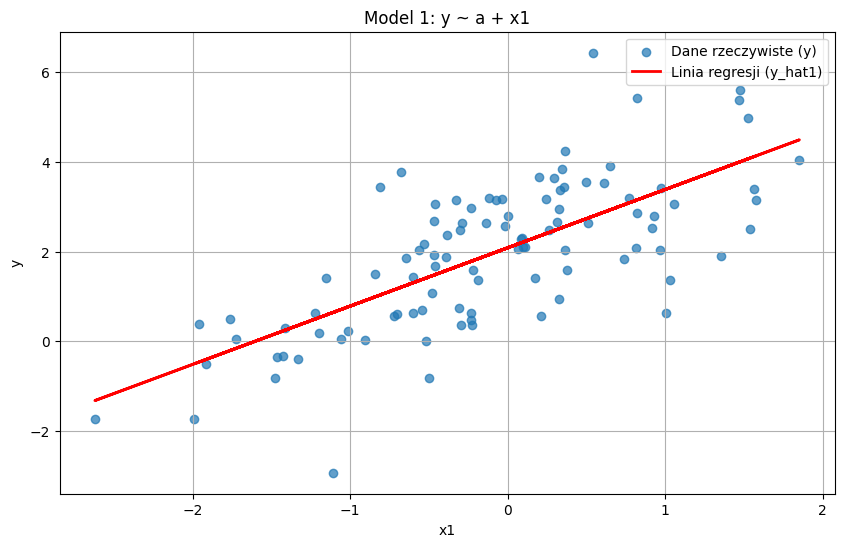


--- Model 2: y ~ a  + x2 ---
Współczynniki b2 ( b2):
[[ 1.96487636]
 [-0.67156217]]

--- Model 3: y ~ a + x1 + x2 ---
Współczynniki b3 (b0, b1, b2):
[[ 2.08864867]
 [ 1.22608936]
 [-0.51227678]]


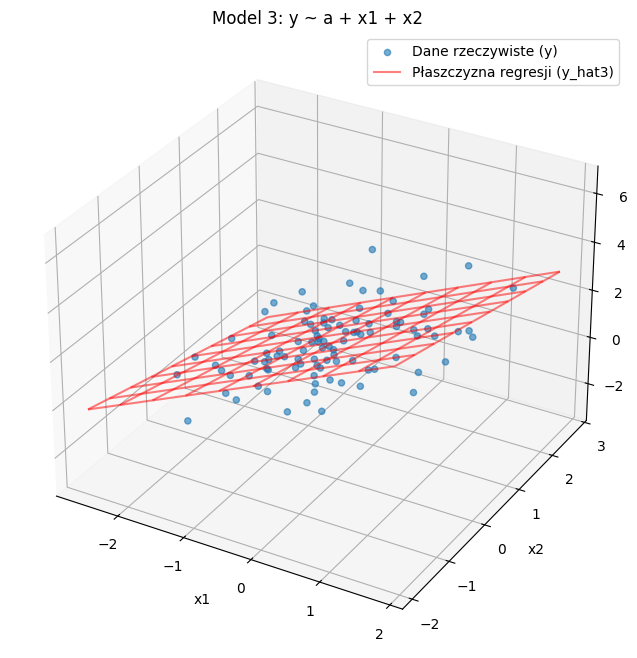


--- Model 4: y ~ a + x1 + x2 + x1*x2 ---
Współczynniki b4 (b0, b1, b2, b3):
[[ 2.08231097]
 [ 1.24887828]
 [-0.53093472]
 [-0.07645649]]


In [ ]:
# ===== Twoja implementacja tutaj =====
from mpl_toolkits.mplot3d import Axes3D # Potrzebne do wykresów 3D

# Ustawienie ziarna dla powtarzalności wyników
np.random.seed(42)


N = 100  # Liczba próbek
mu = 0.0   # Średnia
sigma = 1.0  # Odchylenie standardowe


x1 = np.random.normal(mu, sigma, (N, 1))
x2 = np.random.normal(mu, sigma, (N, 1))
epsilon = np.random.normal(mu, sigma, (N, 1))


#  zależność: y = 2 + x1 - 0.5*x2 + epsilon
y = 2 + x1 - 0.5 * x2 + epsilon

ones = np.ones((N, 1))

print(f"Wymiary x1: {x1.shape}")
print(f"Wymiary x2: {x2.shape}")
print(f"Wymiary y: {y.shape}")
print(f"Wymiary wektora jedynek: {ones.shape}")

Z1 = np.concatenate((ones, x1), axis=1)

#  Rozkład QR
Q1, R1 = np.linalg.qr(Z1)

#  Rozwiązanie równania R_1 * b_1 = Q_1^T * y
b1 = np.linalg.solve(R1, Q1.T @ y)

print(f"--- Model 1: y ~ a + x1 ---")
print(f"Współczynniki b1 (b0, b1):\n{b1}")

#  model
y_hat1 = Z1 @ b1
plt.figure(figsize=(10, 6))
plt.scatter(x1, y, alpha=0.7, label='Dane rzeczywiste (y)')


plt.plot(x1, y_hat1, color='red', linewidth=2, label='Linia regresji (y_hat1)')
plt.title('Model 1: y ~ a + x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Z2
Z2 = np.concatenate((ones,x2),axis =1)


Q2, R2 = np.linalg.qr(Z2)
b2 = np.linalg.solve(R2, Q2.T@y)
print(f"\n--- Model 2: y ~ a  + x2 ---")
print(f"Współczynniki b2 ( b2):\n{b2}")
#  Z3
Z3 = np.concatenate((ones, x1, x2), axis=1)

# 3.2. Rozkład QR
Q3, R3 = np.linalg.qr(Z3)

# Rozwiązanie równania R_3 * b_3 = Q_3^T * y
b3 = np.linalg.solve(R3, Q3.T @ y)

print(f"\n--- Model 3: y ~ a + x1 + x2 ---")
print(f"Współczynniki b3 (b0, b1, b2):\n{b3}")


y_hat3 = Z3 @ b3
# Tworzenie siatki dla płaszczyzny
x1_surf = np.linspace(x1.min(), x1.max(), 10)
x2_surf = np.linspace(x2.min(), x2.max(), 10)
xx1, xx2 = np.meshgrid(x1_surf, x2_surf)

y_hat_surf = b3[0] + b3[1] * xx1 + b3[2] * xx2

# Wykres 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x1, x2, y, alpha=0.6, label='Dane rzeczywiste (y)')


ax.plot_wireframe(xx1, xx2, y_hat_surf, color='red', alpha=0.5, label='Płaszczyzna regresji (y_hat3)')

ax.set_title('Model 3: y ~ a + x1 + x2')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.legend()
plt.show()

x1x2 = x1 * x2

# Z4
Z4 = np.concatenate((ones, x1, x2, x1x2), axis=1)


Q4, R4 = np.linalg.qr(Z4)

# Rozwiązanie równania R_4 * b_4 = Q_4^T * y
b4 = np.linalg.solve(R4, Q4.T @ y)

print(f"\n--- Model 4: y ~ a + x1 + x2 + x1*x2 ---")
print(f"Współczynniki b4 (b0, b1, b2, b3):\n{b4}")


y_hat4 = Z4 @ b4

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)